#### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean,median
from wordcloud import WordCloud, STOPWORDS

#### defining some utility functions

In [2]:
def percentile(low,high,step,list_temp):
    """
    this function takes low, high, step size as input and prints percentiles accordingly
    """
    for i in np.arange(low,high,step):
        print(i,"percentile is ",np.percentile(list_temp ,i))

In [3]:
## code reference https://www.geeksforgeeks.org/generating-word-cloud-python/
def word_cloud(sent_list,title):

    df = pd.DataFrame()
    df["incorrect"] = sent_list
    comment_words = '' 
    stopwords = set(STOPWORDS) 

# iterate through the csv file 
    for val in df.incorrect:
        val = str(val) 
    # split the value 
        tokens = val.split() 
    # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8,8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

#### reading glue scores and dataset

In [4]:
data = pd.read_csv("test_attention.csv")
df = pd.read_csv("glue.csv")
glue = df["glue"].values
test = data["incorrect"].values
test_correct = data["correct"].values

#### boxplot and percentile analysis of glue scores

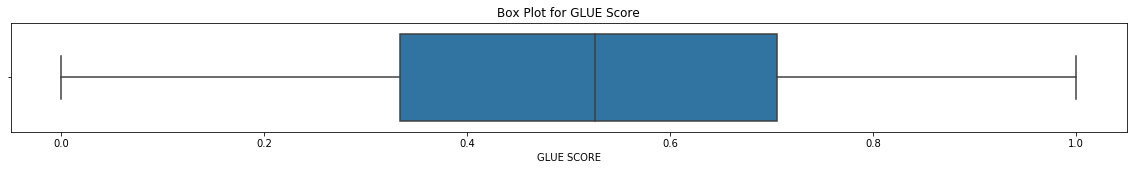

In [5]:
plt.figure(figsize=(20,2))
sns.boxplot(glue)
plt.title("Box Plot for GLUE Score")
plt.xlabel("GLUE SCORE")
plt.show()

In [6]:
## plot percentiles
percentile(0,101,5,glue)

0 percentile is  0.0
5 percentile is  0.15372960372960376
10 percentile is  0.2222222222222222
15 percentile is  0.2692307692307692
20 percentile is  0.3
25 percentile is  0.3333333333333333
30 percentile is  0.38235294117647056
35 percentile is  0.43075380914194067
40 percentile is  0.4655172413793103
45 percentile is  0.5
50 percentile is  0.5263157894736842
55 percentile is  0.5658695652173913
60 percentile is  0.5952380952380952
65 percentile is  0.631578947368421
70 percentile is  0.6666666666666666
75 percentile is  0.705316742081448
80 percentile is  0.7368421052631577
85 percentile is  0.7826086956521741
90 percentile is  0.8461538461538461
95 percentile is  1.0
100 percentile is  1.0


#### observations

1 - min glue score is 0                                                                                                  
2 - max glue score is 1                                                                                                
3 - median glue score is 0.52                                                                                        
4 - IQR range for glue score is from 0.33 to 0.7                                                                        

#### conclusions

based on above analysis we will divide our glue score into three categories low, medium and high

In [7]:
## find indexof scores based on thre categories
low = []
mid = []
high = []

for i in range(len(test)):
    
    if glue[i] > 0.7:
        high.append(i)
        
    elif glue[i] > 0.4:
        mid.append(i)
        
    else:
        low.append(i)

In [8]:
## divide sentences and glue scores into three categories of GLUE Score

## list contains length of sentences based on low, medium and high GLUE Score
len_low_sent = []
len_mid_sent = []
len_high_sent = []

## list contains GLUE scores of sentences based on low, medium and high GLUE Score
low_glue = []
mid_glue = []
high_glue = []

## ## list contains incorrect sentences based on low, medium and high GLUE Score
low_sent = []
mid_sent = []
high_sent = []

## ## list contains icorrect sentences based on low, medium and high GLUE Score
low_sent_corr = []
mid_sent_corr = []
high_sent_corr = []

for i in low:
    len_low_sent.append(len(test[i].split()))
    low_glue.append(glue[i])
    low_sent.append(test[i])
    low_sent_corr.append(test[i])
    
for i in mid:
    len_mid_sent.append(len(test[i].split()))
    mid_glue.append(glue[i])
    mid_sent.append(test[i])
    mid_sent_corr.append(test[i])
    
for i in high:
    len_high_sent.append(len(test[i].split()))
    high_glue.append(glue[i])
    high_sent.append(test[i])
    high_sent_corr.append(test[i])

#### analysis of length of entences based on GLUE Scores

In [9]:
print("mean length of input sentences based on low, medium, high glue scores are", round(mean(len_low_sent),2),round(mean(len_mid_sent),2),round(mean(len_high_sent),2))
print("median length of input sentences based on low, medium, high glue scores are",median(len_low_sent),median(len_mid_sent),median(len_high_sent))

mean length of input sentences based on low, medium, high glue scores are 10.56 11.9 12.03
median length of input sentences based on low, medium, high glue scores are 10.0 11 12


#### analysis of total words and unique words

In [10]:
total_words_low = []
total_words_mid = []
total_words_high = []

for i in low:
    for j in test[i].split():
        total_words_low.append(j)
        
for i in mid:
    for j in test[i].split():
        total_words_mid.append(j)
        
for i in high:
    for j in test[i].split():
        total_words_high.append(j)
        
unique_words_low = set(total_words_low)
unique_words_mid = set(total_words_mid)
unique_words_high = set(total_words_high)

print("TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS LOW ARE",len(total_words_low),"and",len(unique_words_low))
print("TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS MEDIUM ARE",len(total_words_mid),"and",len(unique_words_mid))
print("TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS HIGH ARE",len(total_words_high),"and",len(unique_words_high))

TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS LOW ARE 3358 and 1200
TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS MEDIUM ARE 5080 and 1408
TOTAL WORDS AND UNIQUE WORDS WHEN GLUE SCORE IS HIGH ARE 3068 and 935


#### Analysis of frequent words uding word cloud

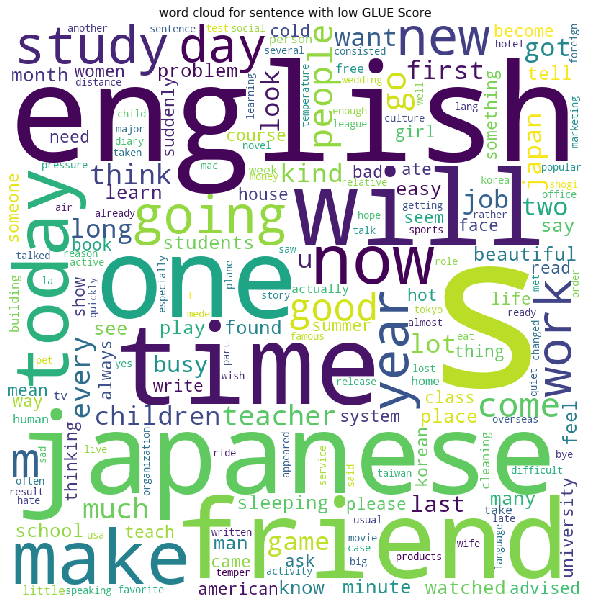

In [35]:
word_cloud(low_sent,"word cloud for sentence with low GLUE Score")

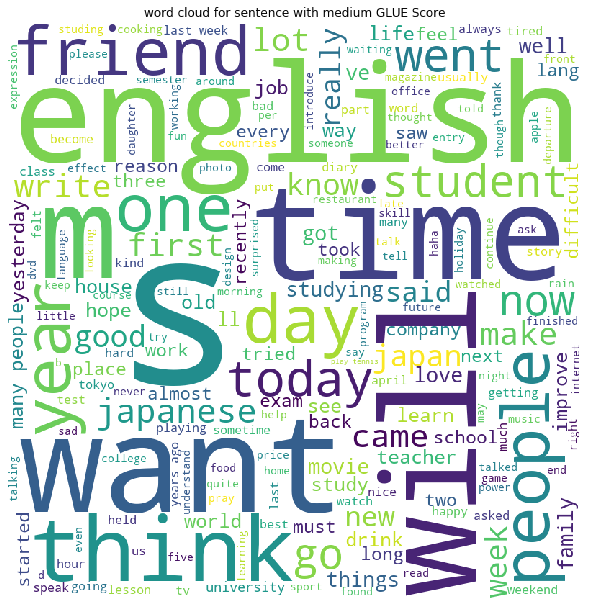

In [32]:
word_cloud(mid_sent,"word cloud for sentence with medium GLUE Score")

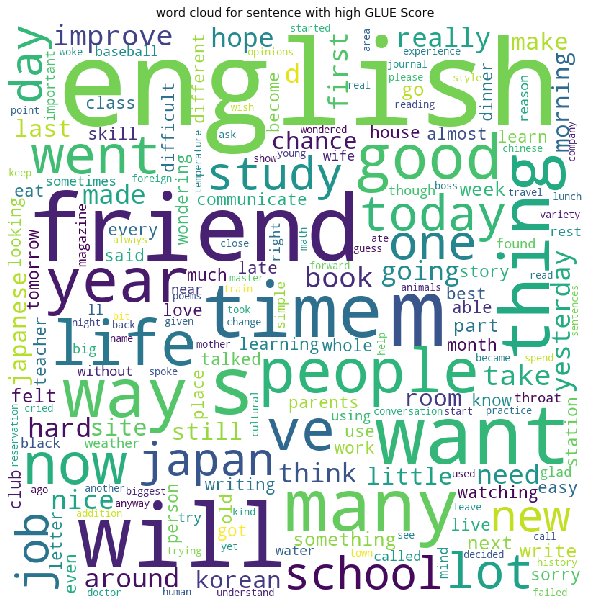

In [34]:
word_cloud(high_sent,"word cloud for sentence with high GLUE Score")

#### Analysis of common word between pair of incorrect and correct sentences

In [49]:
low_word_share = []
mid_word_share = []
high_word_share = []

for i in range(len(low_sent)):
    
    temp1 = set(low_sent[i].split())
    temp2 = set(low_sent_corr[i].split())
    low_word_share.append(len(temp1.intersection(temp2)))
    
for i in range(len(mid_sent)):
    
    temp1 = set(mid_sent[i].split())
    temp2 = set(mid_sent_corr[i].split())
    mid_word_share.append(len(temp1.intersection(temp2)))
    
for i in range(len(high_sent)):
    
    temp1 = set(high_sent[i].split())
    temp2 = set(high_sent_corr[i].split())
    high_word_share.append(len(temp1.intersection(temp2)))
    
print("Average value of common word between pair of incorrect and correct sentences with low GLUE score is",round(mean(low_word_share),2))
print("Average value of common word between pair of incorrect and correct sentences with mid GLUE score is",round(mean(mid_word_share),2))
print("Average value of common word between pair of incorrect and correct sentences with high GLUE score is",round(mean(high_word_share),2))

Average value of common word between pair of incorrect and correct sentences with low GLUE score is 10.04
Average value of common word between pair of incorrect and correct sentences with mid GLUE score is 11.17
Average value of common word between pair of incorrect and correct sentences with high GLUE score is 11.3


#### Summary of Analysis

1 - mean length of input sentences based on low, medium, high glue scores are 10.56, 11.9, 12.03                                
2 - median length of input sentences based on low, medium, high glue scores are 10.0, 11, 12                                 
3 - Unique numbers of word with low medium and high GLUE are 1200,1408,935                                                  
4 - Words like "japnese" and "friend" are more frequently found with low GLUE score                                       
5 - Average number of common word between pair of incorrect and correct sentences with low, medium and high GLUE score are 10.04,11.17,11.3